In [1]:
#Se importan las librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, max_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.cluster import KMeans


In [2]:
#Se leen los datos
Datos = pd.read_csv('C:/Users/alvar/Documents/Maestria en Ciencia de datos/Aprendizaje automatico/Tareas/Tarea 1/typed_uanl.csv')

In [3]:
#Se modifica el conjunto de datos para obtener las agrupaciones que se desean para usar lo datos en los modelos:
sueldo_dependencia = Datos.groupby(["dependencia", "Fecha", "Tipo"])[["Sueldo Neto"]].agg({'Sueldo Neto': ['sum', 'count', 'mean']})
sueldo_dependencia.reset_index(inplace=True)
sueldo_dependencia.columns = ['dependencia','fecha', 'tipo', 'sueldo_neto', 'num_empleados', 'media_pago']
sueldo_dependencia['Pago_Diario_promedio'] = (sueldo_dependencia['media_pago']*12)/365
sueldo_dependencia["fecha"] = pd.to_datetime(sueldo_dependencia["fecha"])
sueldo_dependencia['año'] = sueldo_dependencia['fecha'].dt.year
sueldo_dependencia = sueldo_dependencia.loc[sueldo_dependencia['año'] != 2024]
sueldo_dependencia = sueldo_dependencia.groupby(["dependencia", "tipo"]).agg({'media_pago': ['mean'], 'num_empleados': 'mean', 'Pago_Diario_promedio': 'mean' })
sueldo_dependencia.reset_index(inplace=True)
sueldo_dependencia.columns = ['dependencia', 'tipo', 'sueldo_neto', 'num_empleados', 'pago_diario_promedio']
sueldo_dependencia['num_empleados'] = round(sueldo_dependencia['num_empleados'])

In [5]:
#Se mantienen los datos usados en la practica anterior:
model3 = sueldo_dependencia.loc[(sueldo_dependencia['tipo'] == 'PREPARATORIA') | (sueldo_dependencia['tipo'] == 'FACULTAD')]
model3_x = model3.drop(['dependencia', 'tipo', 'sueldo_neto'], axis = 1, inplace = False)
model3_y = model3.drop(['dependencia', 'sueldo_neto', 'num_empleados', 'pago_diario_promedio'], axis = 1, inplace = False)

In [6]:
#Se separan los datos para observar gráficamente la separación actual de los datos:
num_prepas = model3['tipo'].value_counts()['PREPARATORIA']
model3_prepas = model3_x.iloc[:num_prepas]
model3_facultades = model3_x.iloc[num_prepas:]

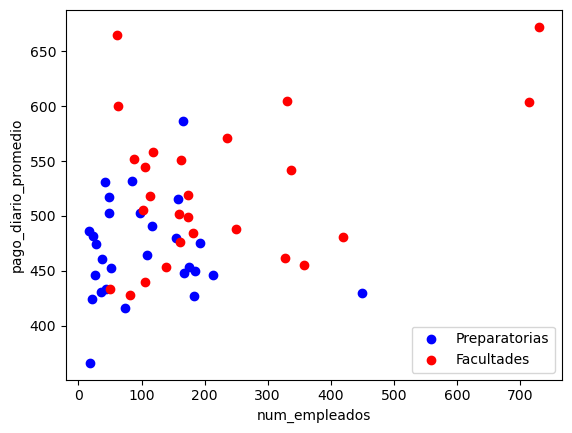

In [7]:
#Se grafican los valores para observar visualmente a cada grupo:
plt.scatter(model3_prepas['num_empleados'], model3_prepas['pago_diario_promedio'], color='blue', label = 'Preparatorias')
plt.scatter(model3_facultades['num_empleados'], model3_facultades['pago_diario_promedio'], color='red', label = 'Facultades')
plt.xlabel("num_empleados")
plt.ylabel("pago_diario_promedio")
plt.legend()

In [8]:
#Se realiza el modelo de agrupación:
model_kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
model_kmeans.fit(model3_x)

c:\Users\alvar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=0)

<Axes: xlabel='num_empleados', ylabel='pago_diario_promedio'>

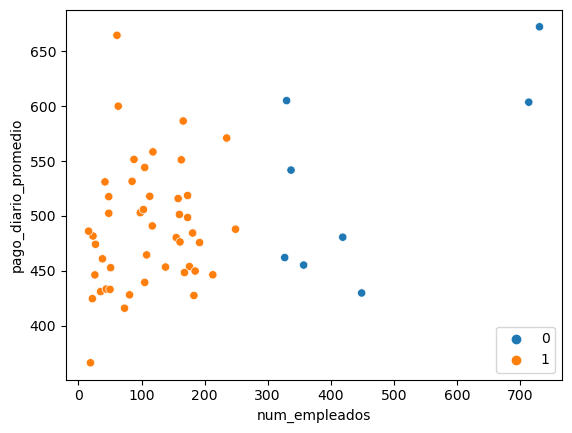

In [9]:
#Se grafican los resultados:
sns.scatterplot(data = model3_x, x = 'num_empleados', y = 'pago_diario_promedio', hue = model_kmeans.labels_)